# Regresion Basica: Predecir eficiencia de gasolina

Este libro usa el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y construye un modelo para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Este ejemplo usa el API `tf.keras` , revise [Esta Guia](https://www.tensorflow.org/guide/keras) para obtener mas detalles.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

## El set de Datos de MPG

El set de datos esta disponible de el siguiente repositorio [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

### Obtenga los datos
Primero descargue el set de datos.
keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [3]:
dataset = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [4]:
dataset

'C:\\Users\\Miguel Angel\\.keras\\datasets\\auto-mpg.data'

Importelo usando pandas.

In [14]:
column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin", "Car name"]

In [73]:
df = pd.read_csv(dataset, names=column_names, delim_whitespace=True)
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


### Limpia los datos

Trata los missings y variables categóricas

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [17]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
Car name        0
dtype: int64

In [18]:
df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [19]:
df['Horsepower'].astype(float)

ValueError: could not convert string to float: '?'

In [25]:
df[df['Horsepower']=="?"]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [74]:
df['Horsepower'] = np.where(df['Horsepower']=="?", np.nan, df['Horsepower']).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [28]:
df[df['Horsepower'].isna()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [75]:
df['Horsepower'].fillna(df['Horsepower'].mean(), inplace=True)

In [31]:
df['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

In [34]:
df[df['Origin']==3]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car name
14,24.0,4,113.0,95.0,2372.0,15.0,70,3,toyota corona mark ii
18,27.0,4,97.0,88.0,2130.0,14.5,70,3,datsun pl510
29,27.0,4,97.0,88.0,2130.0,14.5,71,3,datsun pl510
31,25.0,4,113.0,95.0,2228.0,14.0,71,3,toyota corona
53,31.0,4,71.0,65.0,1773.0,19.0,71,3,toyota corolla 1200
...,...,...,...,...,...,...,...,...,...
382,34.0,4,108.0,70.0,2245.0,16.9,82,3,toyota corolla
383,38.0,4,91.0,67.0,1965.0,15.0,82,3,honda civic
384,32.0,4,91.0,67.0,1965.0,15.7,82,3,honda civic (auto)
385,38.0,4,91.0,67.0,1995.0,16.2,82,3,datsun 310 gx


In [76]:
df['USA'] = np.where(df['Origin']==1, 1, 0)
df['Europe'] = np.where(df['Origin']==2, 1, 0)
df['Japan'] = np.where(df['Origin']==3, 1, 0)
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car name,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1,0,0


In [77]:
lista_marcas = df['Car name'].str.split(expand = True, n=1)[0]
lista_marcas

0      chevrolet
1          buick
2       plymouth
3            amc
4           ford
         ...    
393         ford
394           vw
395        dodge
396         ford
397        chevy
Name: 0, Length: 398, dtype: object

In [48]:
lista_marcas.value_counts()

ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
renault           5
saab              4
subaru            4
opel              4
chevy             3
bmw               2
cadillac          2
maxda             2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: 0, dtype: int64

In [54]:
len(lista_marcas.unique())

37

In [78]:
df['Marca'] = lista_marcas
orden = df.groupby('Marca')['MPG'].mean().sort_values(ascending=True)
orden

Marca
hi                9.000000
chevroelt        16.000000
chrysler         17.266667
chevy            18.000000
amc              18.246429
mercury          19.118182
buick            19.182353
ford             19.694118
cadillac         19.750000
pontiac          20.012500
chevrolet        20.472093
oldsmobile       21.100000
volvo            21.116667
plymouth         21.703226
dodge            22.060714
toyouta          23.000000
mercedes-benz    23.250000
peugeot          23.687500
bmw              23.750000
saab             23.900000
capri            25.000000
mercedes         25.400000
opel             25.750000
maxda            26.050000
audi             26.714286
toyota           28.372000
fiat             28.912500
volkswagen       29.106667
vokswagen        29.800000
subaru           30.525000
mazda            30.860000
datsun           31.113043
renault          32.880000
honda            33.761538
triumph          35.000000
nissan           36.000000
vw               39.01

In [79]:
le = pd.DataFrame(np.arange(1,38), columns=["le_marca"], index = orden.index)
le

,le_marca
Marca,
hi,1
chevroelt,2
chrysler,3
chevy,4
amc,5
mercury,6
buick,7
ford,8
cadillac,9


In [80]:
df = pd.merge(df, le, left_on="Marca", right_index=True)
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car name,USA,Europe,Japan,Marca,le_marca
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1,0,0,chevrolet,11
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala,1,0,0,chevrolet,11
12,15.0,8,400.0,150.0,3761.0,9.5,70,1,chevrolet monte carlo,1,0,0,chevrolet,11
30,28.0,4,140.0,90.0,2264.0,15.5,71,1,chevrolet vega 2300,1,0,0,chevrolet,11
35,17.0,6,250.0,100.0,3329.0,15.5,71,1,chevrolet chevelle malibu,1,0,0,chevrolet,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,23.0,8,350.0,125.0,3900.0,17.4,79,1,cadillac eldorado,1,0,0,cadillac,9
297,25.4,5,183.0,77.0,3530.0,20.1,79,2,mercedes benz 300d,0,1,0,mercedes,22
332,29.8,4,89.0,62.0,1845.0,15.3,80,2,vokswagen rabbit,0,1,0,vokswagen,29
335,35.0,4,122.0,88.0,2500.0,15.1,80,2,triumph tr7 coupe,0,1,0,triumph,35


### Divide los datos en train y test

Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

NOTA: El resultado tienen que ser dos datasets

In [81]:
df.drop(columns=["Car name", "Origin", 'Marca'], inplace=True)

In [82]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan,le_marca
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0,11
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,0,0,11
12,15.0,8,400.0,150.0,3761.0,9.5,70,1,0,0,11
30,28.0,4,140.0,90.0,2264.0,15.5,71,1,0,0,11
35,17.0,6,250.0,100.0,3329.0,15.5,71,1,0,0,11


In [85]:
train = df.sample(frac=0.8, random_state=0)
test = df.drop(train.index)

In [86]:
print(train.shape)
print(test.shape)

(318, 11)
(80, 11)


### Inspecciona los datos

Revise rapidamente la distribucion conjunta del dataset de entrenamiento mediante un grid de gráficos

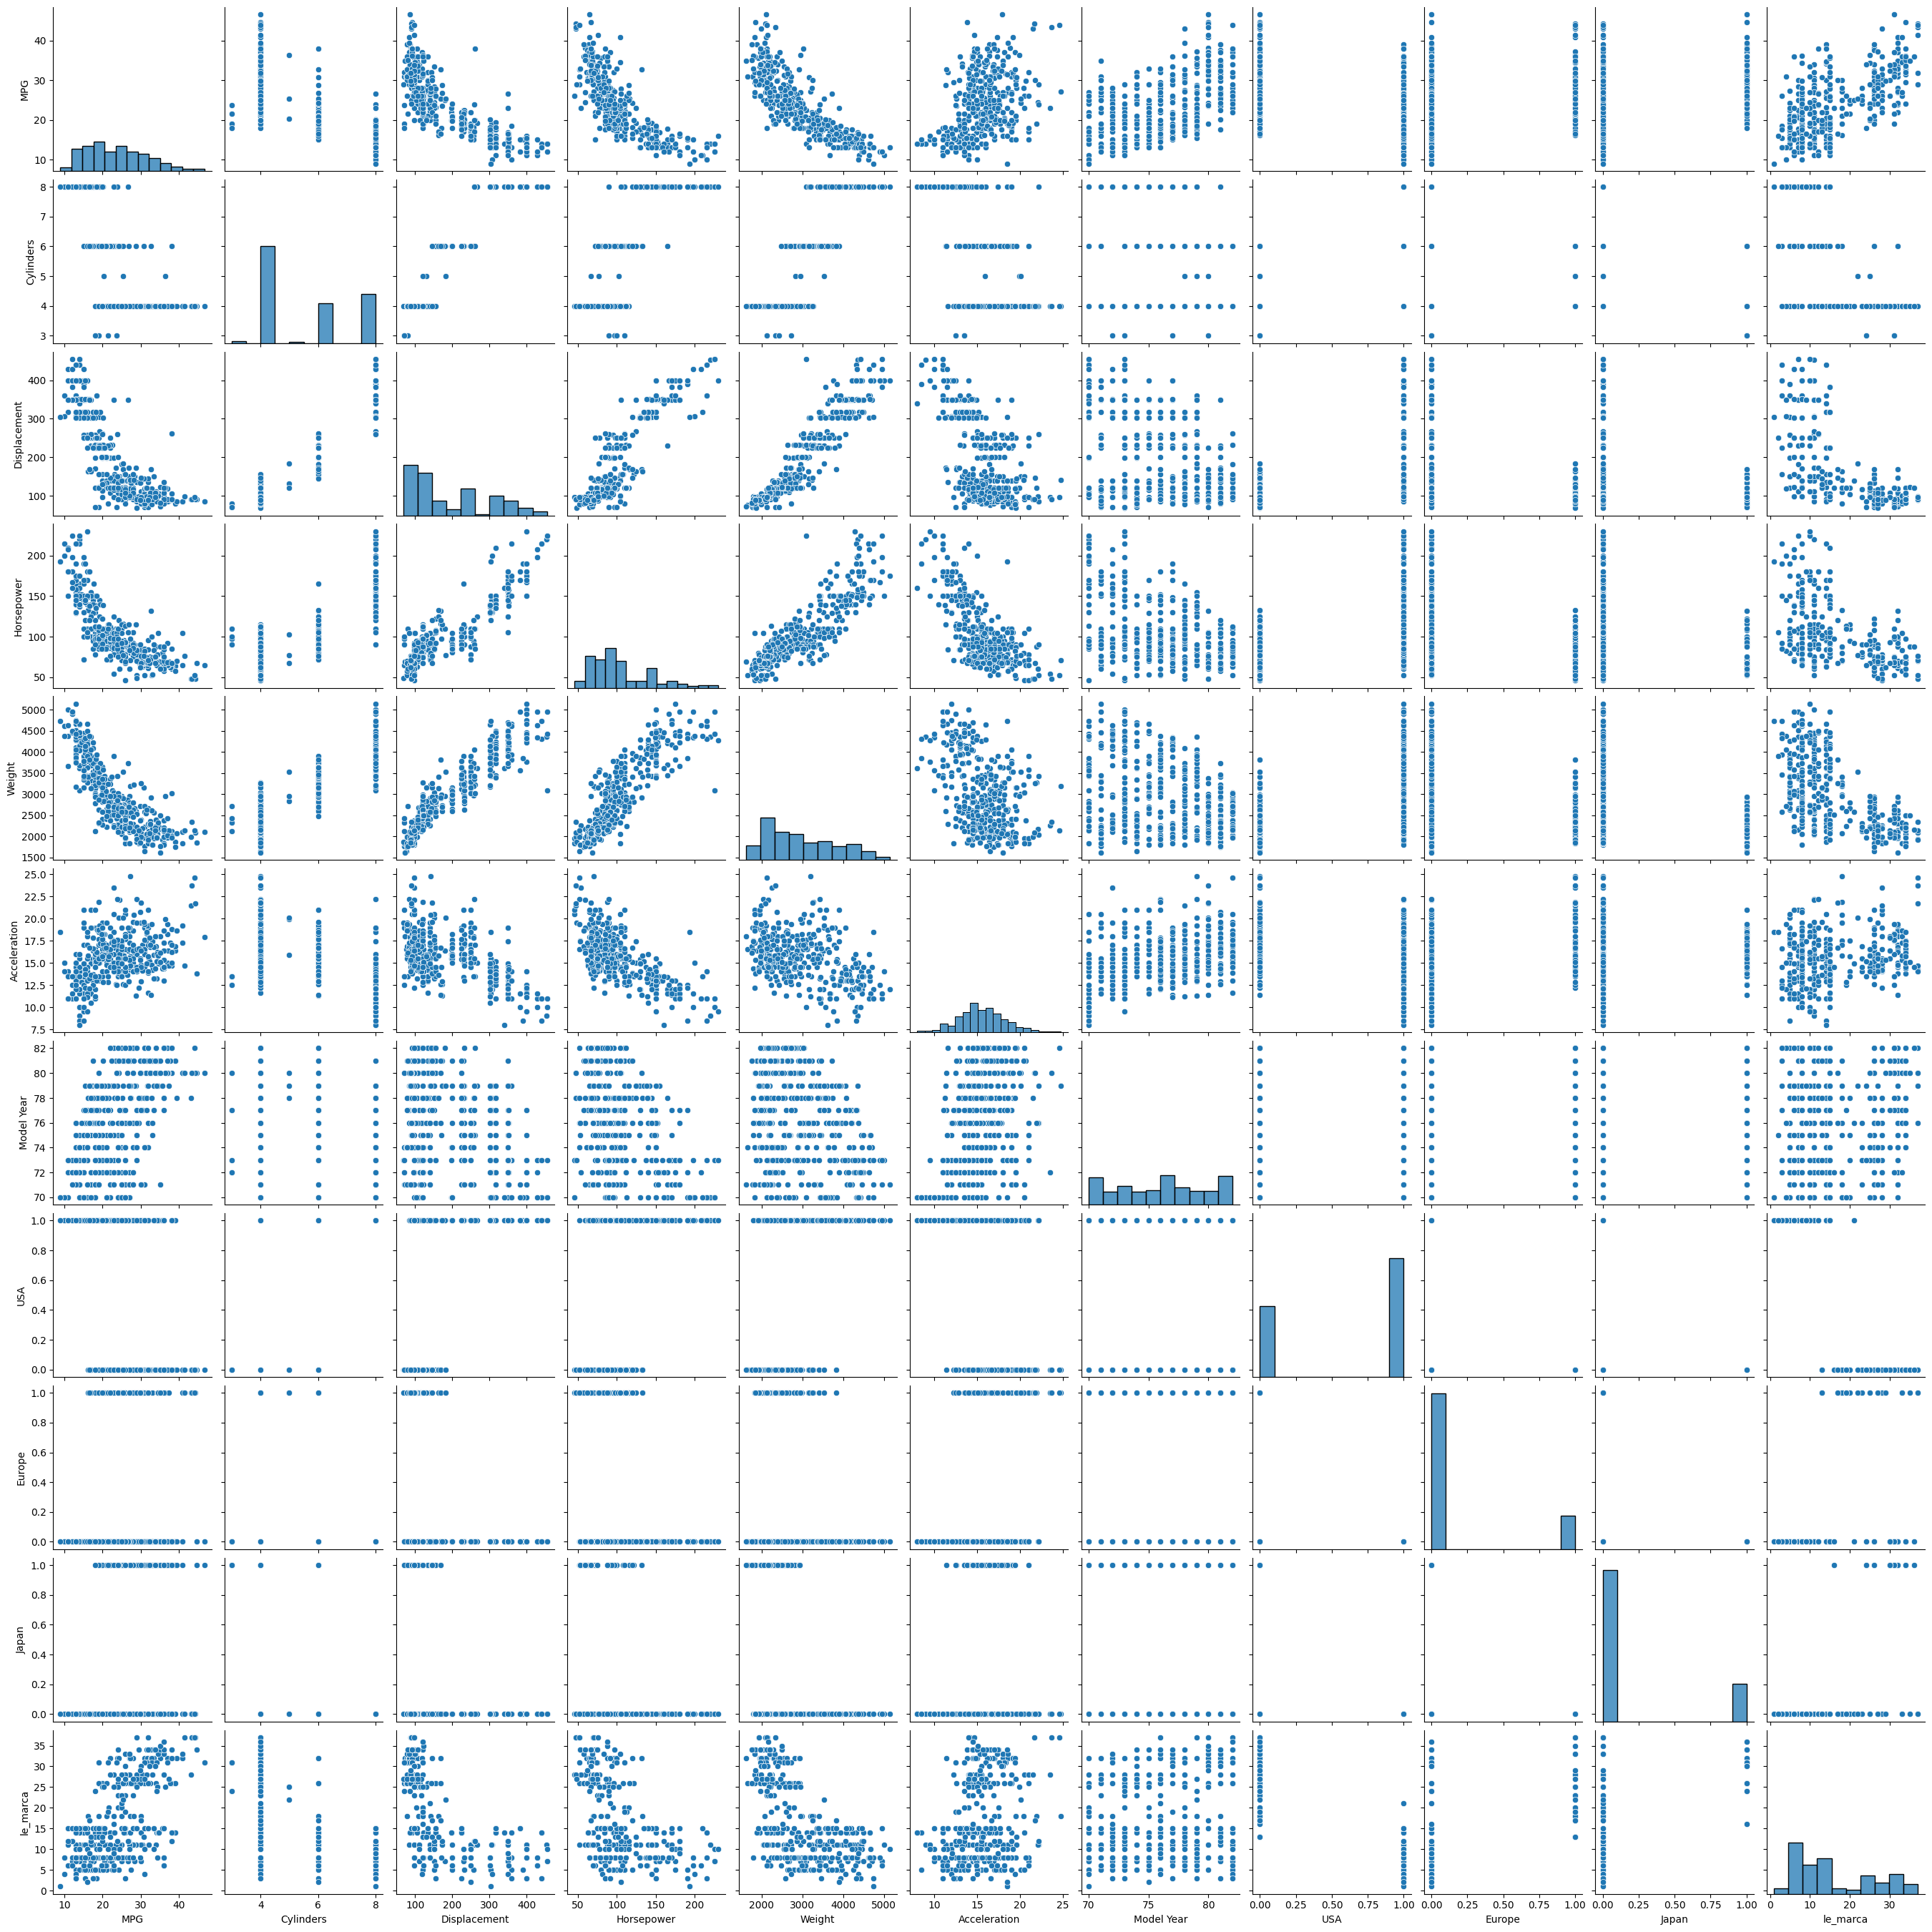

In [83]:
sns.pairplot(df)

Tambien revise las estadisticas generales:

In [87]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan,le_marca
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,0.625628,0.175879,0.198492,16.381910
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.484569,0.381197,0.399367,9.771179
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000,8.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000,14.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000,26.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000,37.000000


<Axes: >

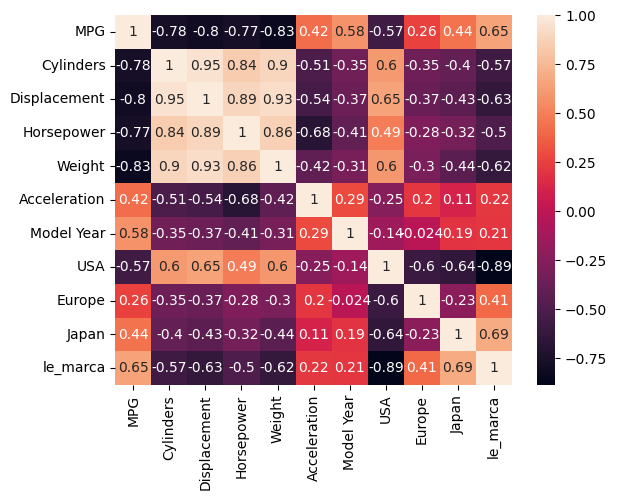

In [88]:
sns.heatmap(df.corr(), annot=True)

### Separa las features del target

Separe el target de las features.

In [89]:
X_train = train.drop(columns="MPG")
X_test = test.drop(columns="MPG")

y_train = train["MPG"]
y_test = test["MPG"]

In [90]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(318, 10)
(80, 10)
(318,)
(80,)


### Estandariza los datos

Es una buena práctica estandarizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo podría converger sin estandarizar, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

Estos datos estandarizados es lo que usaremos para entrenar el modelo.

## El modelo

### Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo.

Por tanto, tendrá tres capas. Una de entrada con activación relu. Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres para las dos primeras capas.

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

In [95]:
X_train.shape[1:]

(10,)

In [97]:
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="relu")
])

model.compile(
    loss="mse",
    optimizer= keras.optimizers.RMSprop(0.001),
    metrics="mae"
)

### Inspeccione el modelo

Use el método `.summary` para imprimir una descripción simple del modelo

In [98]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                704       
                                                                 
 dense_5 (Dense)             (None, 16)                1040      
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1761 (6.88 KB)
Trainable params: 1761 (6.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
10 * 64 + 64

704

In [101]:
64 * 16 + 16

1040

### Entrenar el modelo

Entrene el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

NOTA: recuerda usar los datos normalizados.

In [102]:
early_stopping = keras.callbacks.EarlyStopping(patience=10)

history = model.fit(X_train_scal, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/1000


8/8 [==============================] - 2s 40ms/step - loss: 582.4214 - mae: 22.8006 - val_loss: 610.4536 - val_mae: 23.4189
Epoch 2/1000
8/8 [==============================] - 0s 12ms/step - loss: 559.7544 - mae: 22.2960 - val_loss: 584.4481 - val_mae: 22.8779
Epoch 3/1000
8/8 [==============================] - 0s 12ms/step - loss: 535.8712 - mae: 21.7673 - val_loss: 558.4136 - val_mae: 22.3097
Epoch 4/1000
8/8 [==============================] - 0s 12ms/step - loss: 511.2869 - mae: 21.1944 - val_loss: 531.6837 - val_mae: 21.7039
Epoch 5/1000
8/8 [==============================] - 0s 14ms/step - loss: 485.1734 - mae: 20.5717 - val_loss: 503.0019 - val_mae: 21.0337
Epoch 6/1000
8/8 [==============================] - 0s 23ms/step - loss: 457.0646 - mae: 19.8760 - val_loss: 471.7988 - val_mae: 20.2832
Epoch 7/1000
8/8 [==============================] - 0s 24ms/step - loss: 426.5579 - mae: 19.0986 - val_loss: 437.6089 - val_mae: 19.4430
Epoch 8/1000
8/8 [=====================

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

In [104]:
history.history

{'loss': [582.4214477539062,
  559.75439453125,
  535.8711547851562,
  511.28692626953125,
  485.1733703613281,
  457.0646057128906,
  426.55792236328125,
  393.5792541503906,
  357.6378173828125,
  317.5467529296875,
  277.2740478515625,
  238.4745330810547,
  200.4019775390625,
  164.23382568359375,
  130.944580078125,
  101.56392669677734,
  77.42964935302734,
  58.736358642578125,
  45.382328033447266,
  35.90043640136719,
  29.236473083496094,
  24.517032623291016,
  21.246740341186523,
  18.807918548583984,
  17.01215362548828,
  15.728633880615234,
  14.569174766540527,
  13.812323570251465,
  13.05173110961914,
  12.266036033630371,
  11.721026420593262,
  11.297962188720703,
  10.737723350524902,
  10.388707160949707,
  10.040852546691895,
  9.689187049865723,
  9.547621726989746,
  9.372907638549805,
  9.219534873962402,
  9.020490646362305,
  8.81139087677002,
  8.582159996032715,
  8.490432739257812,
  8.352783203125,
  8.190953254699707,
  8.101008415222168,
  8.1339206695

<Axes: >

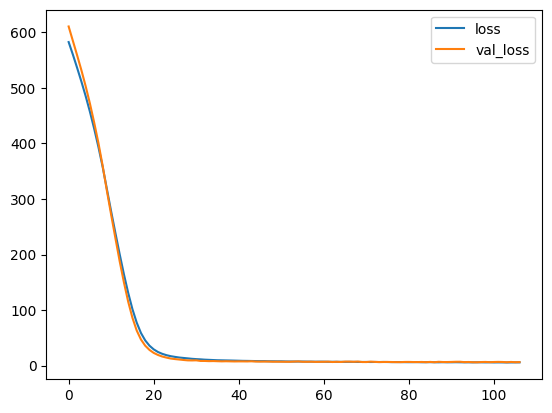

In [108]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()

¿Alguna conclusión respecto a este gráfico?

Earlystopping me ha ayudado a detener el entrenamiento para no caer en overfitting, también para ahorrar recursos innecesarios.

Observamos que si le damos muchas epochs al entrenamiento tiende a un overfitting, siendo el error en validación cada vez más alto. Sería interesante utilizar un número aprox de 30 epochs

Añade un early stopping al modelo. Pon el argumento `callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]` dentro del fit().

Visualiza el progreso de entrenamiento.

In [114]:
model_2 = keras.Sequential([
    keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1, activation="relu")
])

model_2.compile(
    loss="mse",
    optimizer= keras.optimizers.RMSprop(0.001),
    metrics="mae"
)

In [115]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

history = model_2.fit(X_train_scal, y_train, epochs=1000, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/1000
8/8 [==============================] - 1s 34ms/step - loss: 586.2084 - mae: 22.9541 - val_loss: 604.7672 - val_mae: 23.4850
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 552.9291 - mae: 22.2807 - val_loss: 567.6899 - val_mae: 22.6393
Epoch 3/1000
8/8 [==============================] - 0s 10ms/step - loss: 517.3160 - mae: 21.4089 - val_loss: 533.1385 - val_mae: 21.8419
Epoch 4/1000
8/8 [==============================] - 0s 12ms/step - loss: 483.1836 - mae: 20.5788 - val_loss: 495.8672 - val_mae: 20.9785
Epoch 5/1000
8/8 [==============================] - 0s 10ms/step - loss: 446.8584 - mae: 19.6768 - val_loss: 455.6898 - val_mae: 20.0165
Epoch 6/1000
8/8 [==============================] - 0s 9ms/step - loss: 408.2094 - mae: 18.6899 - val_loss: 412.1716 - val_mae: 18.9369
Epoch 7/1000
8/8 [==============================] - 0s 10ms/step - loss: 366.1661 - mae: 17.5784 - val_loss: 363.6385 - val_mae: 17.6935
Epoch 8/1000
8/8 [=========================

<Axes: >

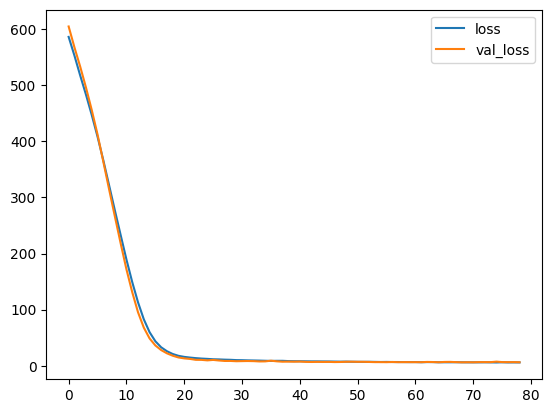

In [116]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()

Interpreta el gráfico

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [112]:
model.evaluate(X_test_scal, y_test)

3/3 [==============================] - 0s 7ms/step - loss: 8.3854 - mae: 2.0773


[8.385354995727539, 2.0773348808288574]

In [117]:
model_2.evaluate(X_test_scal, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 8.5057 - mae: 2.0089


[8.505733489990234, 2.0088589191436768]

Ahora prueba el modelo. Coge 10 ejemplos de test y llama a` model.predict`.

In [119]:
model_2.predict(X_test_scal[:10])

1/1 [==============================] - 0s 310ms/step


array([[14.193151],
       [27.701517],
       [15.699365],
       [17.966793],
       [30.636108],
       [27.252184],
       [28.655296],
       [26.115557],
       [12.823226],
       [19.205154]], dtype=float32)

### Haz Predicciones

Dibuja en un scatter plot las predicciones de test vs sus true labels.

In [124]:
y_pred = model_2.predict(X_test_scal).flatten() #.reshape(-1)
y_pred

3/3 [==============================] - 0s 3ms/step


array([14.193151, 27.701517, 15.699365, 17.966793, 30.636108, 27.252184,
       28.655296, 26.115557, 12.823226, 19.205154, 27.31756 , 17.269444,
       12.933602, 19.19705 , 33.88959 , 32.537674, 37.055016, 14.933278,
       13.922277, 15.540441, 20.462952, 22.59524 , 16.8624  , 21.125814,
       19.413439, 23.769102, 23.382252, 19.949512, 17.742592, 34.794907,
       24.39057 , 12.842237, 12.943578, 22.299551, 23.21794 , 27.807081,
       27.036678, 16.395962, 13.965447, 26.577908, 17.34602 , 18.01994 ,
       17.158607, 30.912228, 24.784027, 24.610569, 30.839863, 28.628492,
       24.539646, 27.750582, 23.598724, 29.011166, 35.17135 , 19.886005,
       23.798485, 23.139599, 31.412668, 29.994839, 21.039616, 25.384417,
       27.114582, 25.59238 , 23.781467, 11.994548, 14.710888, 17.243282,
       35.349068, 34.7723  , 18.135399, 19.51953 , 19.580206, 34.721794,
       33.828766, 32.614975, 34.41642 , 33.076313, 33.19906 , 16.148417,
       33.70153 , 32.388954], dtype=float32)

Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.

Representa los residuos en un histograma

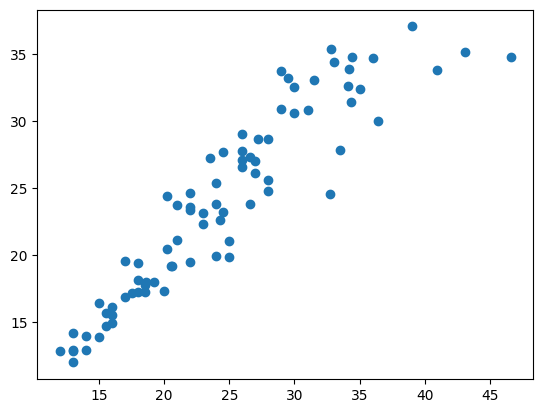

In [125]:
plt.scatter(y_test, y_pred)

Text(0.5, 1.0, 'Distribución de errores')

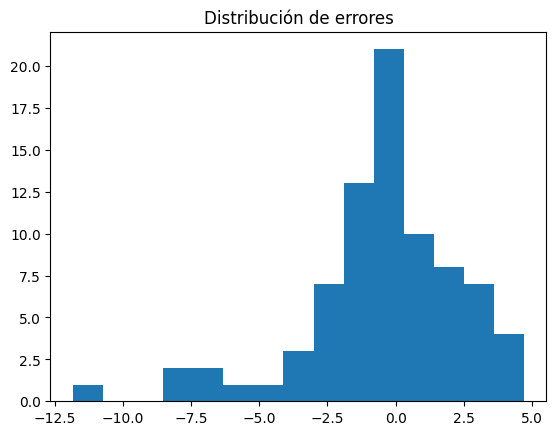

In [126]:
error = y_pred - y_test
plt.hist(error, bins=15)
plt.title("Distribución de errores")

No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.

Guarda tu modelo en un archivo.

In [127]:
model_2.save("final_model.keras")

In [129]:
imported_model = keras.models.load_model("final_model.keras")

## Conclusion

* MSE es una función de pérdida común para problemas de regresión, se sigue utilizando en RN
* Métricas de evaluación de regresión similares
* Transformaciones y feauture engineering del problema, clave para encontrar correlaciones con el target que inicialmente no teníamos
* Escalar datos buena práctica
* Para evitar overfitting, combinar con un EarlyStopping